# 1. Import Libraries 

In [1]:
#%reload_ext autoreload
#%autoreload 2
%matplotlib notebook

In [2]:
PATH = "/home/khan74/scratch/new_DL_DES/"
sz=224
batch_size=64

In [3]:
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense
from keras.applications import ResNet50, Xception
from keras.models import Model, Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras import optimizers
from keras.applications.resnet50 import preprocess_input
from keras.models import load_model

Using TensorFlow backend.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd 
import numpy as np

In [5]:
import os
from os import listdir
from os.path import isfile, join, exists

# 2. Load Data / Create data_generators

In [6]:
train_df = pd.read_csv(PATH + 'deeplearning/data/training_set.csv')
val_df = pd.read_csv(PATH + 'deeplearning/data/validation_set.csv')
HP_crossmatch_df = pd.read_csv(PATH + 'deeplearning/data/high_prob_crossmatch_test_set.csv')
FO_crossmatch_df = pd.read_csv(PATH + 'deeplearning/data/full_overlap_crossmatch_test_set.csv')

#### flow_from_dir

In [7]:
train_data_dir = f'{PATH}deeplearning/data/train/'
validation_data_dir = f'{PATH}deeplearning/data/valid/'

HP_SDSS_test_data_dir = f'{PATH}deeplearning/data/HP_crossmatch_test/sdss/'
HP_DES_test_data_dir = f'{PATH}deeplearning/data/HP_crossmatch_test/des/'

FO_SDSS_test_data_dir = f'{PATH}deeplearning/data/FO_crossmatch_test/sdss/'
FO_DES_test_data_dir = f'{PATH}deeplearning/data/FO_crossmatch_test/des/'

In [8]:
train_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
vertical_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=45)

valid_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
vertical_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=45)




train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (sz, sz),
batch_size = batch_size, 
class_mode = "categorical",
shuffle = True,
interpolation = 'nearest')

validation_generator = valid_datagen.flow_from_directory(
validation_data_dir,
target_size = (sz, sz),
batch_size = 1,
class_mode = "categorical",
shuffle = False,
interpolation = 'nearest')




HP_SDSS_test_generator = test_datagen.flow_from_directory(
HP_SDSS_test_data_dir,
target_size = (sz, sz),
batch_size = 1,
class_mode = None,
shuffle = False)

HP_DES_test_generator = test_datagen.flow_from_directory(
HP_DES_test_data_dir,
target_size = (sz, sz),
batch_size = 1,
class_mode = None,
shuffle = False)




FO_SDSS_test_generator = test_datagen.flow_from_directory(
FO_SDSS_test_data_dir,
target_size = (sz, sz),
batch_size = 1,
class_mode = None,
shuffle = False)

FO_DES_test_generator = test_datagen.flow_from_directory(
FO_DES_test_data_dir,
target_size = (sz, sz),
batch_size = 1,
class_mode = None,
shuffle = False)

Found 36620 images belonging to 2 classes.
Found 963 images belonging to 2 classes.
Found 1066 images belonging to 1 classes.
Found 1066 images belonging to 1 classes.
Found 12596 images belonging to 1 classes.
Found 12596 images belonging to 1 classes.


# 3. Define Model 

In [9]:
num_of_classes = 2

base_model = Xception(input_shape=(sz,sz,3), weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.7)(x)
x = Dense(1024, activation="relu", name='second_last_layer')(x)
predictions = Dense(num_of_classes, activation="softmax")(x)

model_final = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model_final.summary()

model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.Adam(lr=0.0001), metrics=["accuracy"])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

# 4. Train

## 1. Training Data 

<IPython.core.display.Javascript object>


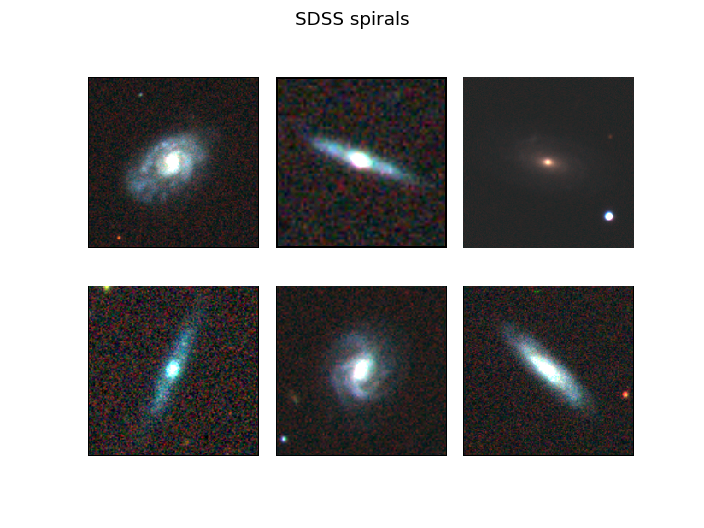

In [10]:
files_s = os.listdir(f'{PATH}deeplearning/data/train/spiral')[:20]
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.axis('Off')
    plt.subplots_adjust(wspace=0.1,hspace=0.05)
    plt.suptitle('SDSS spirals')
    img = plt.imread(f'{PATH}deeplearning/data/train/spiral/{files_s[i]}')
    plt.imshow(img)
#plt.savefig('SDSS_spirals.pdf')

<IPython.core.display.Javascript object>


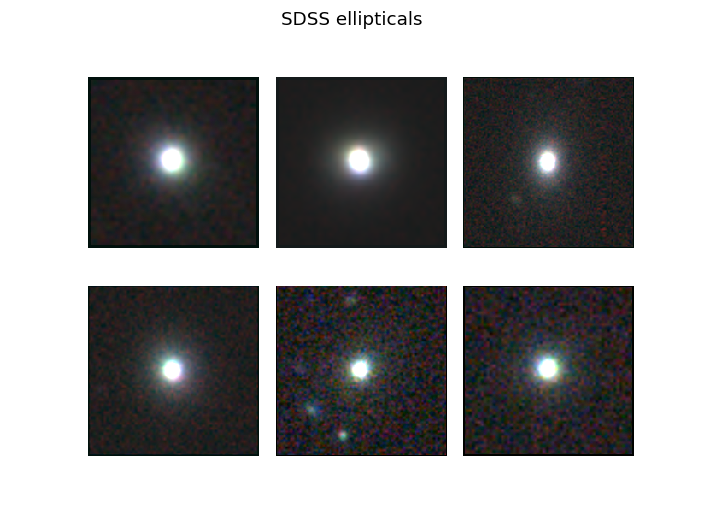

In [11]:
files_e = os.listdir(f'{PATH}deeplearning/data/train/elliptical')[:20]
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.axis('Off')
    plt.subplots_adjust(wspace=0.1,hspace=0.05)
    plt.suptitle('SDSS ellipticals')
    img = plt.imread(f'{PATH}deeplearning/data/train/elliptical/{files_e[i+12]}')
    plt.imshow(img)
#plt.savefig('SDSS_elliptical.pdf')

## 2. Data Augmentation 

## 3. Learning 

In [ ]:
K.clear_session()

In [12]:
os.environ["CUDA_VISIBLE_DEVICES"]='0'

In [13]:
history_1 = model_final.fit_generator(
train_generator,
steps_per_epoch = train_generator.n // train_generator.batch_size,
epochs = 1,
validation_data = validation_generator,
validation_steps = validation_generator.n // validation_generator.batch_size) 

Epoch 1/1
572/572 [==============================] - 1383s 2s/step - loss: 0.2606 - acc: 0.8936 - val_loss: 1.9794 - val_acc: 0.5597


In [14]:
model_final.save(PATH + 'deeplearning/weights/XceptionNew_freeze.h5')

In [15]:
#model_final = load_model('/home/khan74/scratch/data/SDSS/model_weights/Xception.h5')
model_final = load_model(PATH + 'deeplearning/weights/XceptionNew_freeze.h5')

#### (ii) Unfreeze [at Layer 40]

In [17]:
len(model_final.layers)

137

In [18]:
split_at = 40
for layer in model_final.layers[:split_at]: layer.trainable = False
for layer in model_final.layers[split_at:]: layer.trainable = True  
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.Adam(lr=0.0001), metrics=["accuracy"])

In [21]:
#Select Call Backs

Early_Stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-8, verbose=1, mode='min')
checkpoint = keras.callbacks.ModelCheckpoint(PATH + 'deeplearning/weights/Xception_new_UnFreeze.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min', period=1)


In [ ]:
%%time
history2 = model_final.fit_generator(train_generator, steps_per_epoch=train_generator.n // train_generator.batch_size, epochs=20, workers=1,
        validation_data=validation_generator, validation_steps=validation_generator.n // validation_generator.batch_size, callbacks=[Early_Stop, reduce_lr, checkpoint])

Epoch 1/20
572/572 [==============================] - 1380s 2s/step - loss: 0.0437 - acc: 0.9850 - val_loss: 0.2977 - val_acc: 0.9055

Epoch 00001: val_loss improved from inf to 0.29769, saving model to /home/khan74/scratch/new_DL_DES/deeplearning/weights/Xception_new_UnFreeze.h5
Epoch 2/20
572/572 [==============================] - 1339s 2s/step - loss: 0.0199 - acc: 0.9938 - val_loss: 0.2158 - val_acc: 0.9242

Epoch 00002: val_loss improved from 0.29769 to 0.21579, saving model to /home/khan74/scratch/new_DL_DES/deeplearning/weights/Xception_new_UnFreeze.h5
Epoch 3/20
572/572 [==============================] - 1714s 3s/step - loss: 0.0155 - acc: 0.9953 - val_loss: 0.8560 - val_acc: 0.8650

Epoch 00003: val_loss did not improve from 0.21579
Epoch 4/20
524/572 [==========================>...] - ETA: 2:24 - loss: 0.0129 - acc: 0.9963

#### (iii) Unfreeze [at Layer 2] 

In [9]:
model_final = load_model(PATH + 'deeplearning/weights/Xception_new_UnFreeze.h5')

In [11]:
split_at = 2
for layer in model_final.layers[:split_at]: layer.trainable = False
for layer in model_final.layers[split_at:]: layer.trainable = True  
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.Adam(lr=0.0001), metrics=["accuracy"])

In [15]:
#Select Call Backs

Early_Stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-8, verbose=1, mode='min')
checkpoint = keras.callbacks.ModelCheckpoint(PATH + 'deeplearning/weights/Xception_new_UnFreeze_2.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min', period=1)


In [16]:
%%time
history3 = model_final.fit_generator(train_generator, steps_per_epoch=train_generator.n // train_generator.batch_size, epochs=20, workers=1,
        validation_data=validation_generator, validation_steps=validation_generator.n // validation_generator.batch_size, callbacks=[Early_Stop, reduce_lr, checkpoint])

Epoch 1/20
572/572 [==============================] - 1782s 3s/step - loss: 0.0199 - acc: 0.9945 - val_loss: 0.0058 - val_acc: 0.9990

Epoch 00001: val_loss improved from inf to 0.00583, saving model to /home/khan74/scratch/new_DL_DES/deeplearning/weights/Xception_new_UnFreeze_2.h5
Epoch 2/20
572/572 [==============================] - 1528s 3s/step - loss: 0.0104 - acc: 0.9971 - val_loss: 0.0041 - val_acc: 0.9979

Epoch 00002: val_loss improved from 0.00583 to 0.00409, saving model to /home/khan74/scratch/new_DL_DES/deeplearning/weights/Xception_new_UnFreeze_2.h5
Epoch 3/20
572/572 [==============================] - 1397s 2s/step - loss: 0.0075 - acc: 0.9981 - val_loss: 0.0047 - val_acc: 0.9979

Epoch 00003: val_loss did not improve from 0.00409
Epoch 4/20
572/572 [==============================] - 1547s 3s/step - loss: 0.0067 - acc: 0.9982 - val_loss: 0.0181 - val_acc: 0.9969

Epoch 00004: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 00004: val_loss did no

<IPython.core.display.Javascript object>


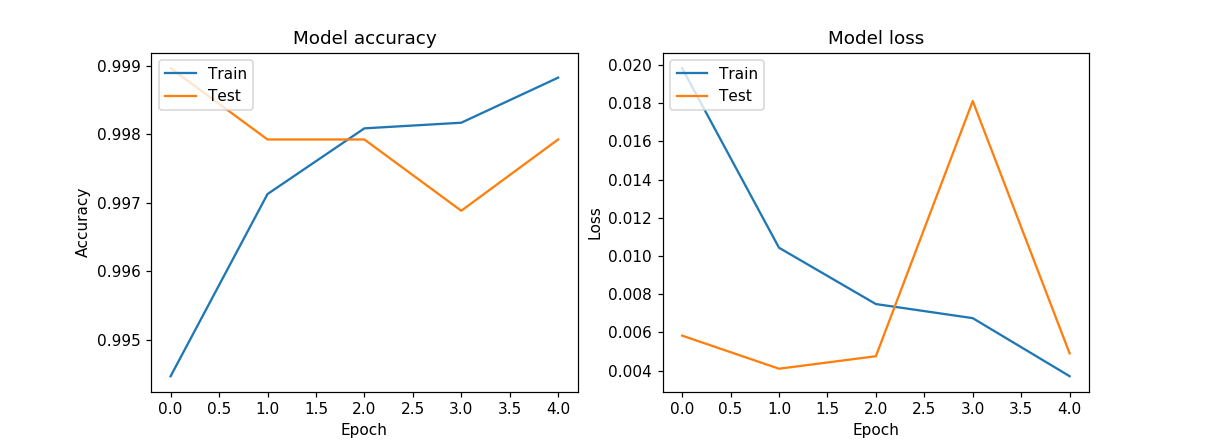

In [28]:
#Training Accuracy/Loss

plt.figure( figsize=(11,4) )

# Plot training & validation accuracy values
plt.subplot(1,2,1)
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 4. Save Final Model with Weights 

In [17]:
#model_final.save(PATH + 'deeplearning/weights/Xception_Final.h5')

In [9]:
model_final = load_model(PATH + 'deeplearning/weights/Xception_Final.h5')

# 5. HP Crossmatch Test 

### Load sklearn / Def metrics 

In [10]:
import itertools
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          figure_size = (11, 6),
                          save=0):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    #if normalize:
        #cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    plt.figure(figsize=figure_size)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    if save==1:
        plt.savefig('confusion_matrix.pdf')
        plt.savefig('confusion_matrix.png')

### (i) SDSS 

In [12]:
HP_SDSS_predictions = model_final.predict_generator(HP_SDSS_test_generator,  verbose=1)

1066/1066 [==============================] - 19s 18ms/step


In [13]:
HP_SDSS_predicted_class_indices=np.argmax(HP_SDSS_predictions,axis=1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in HP_SDSS_predicted_class_indices]

filenames=HP_SDSS_test_generator.filenames
#filenames = [x.split('/')[1].split('.')[0] for x in filenames]

results=pd.DataFrame({"Filename":filenames,
                      "Labels":predictions,
                     "Predictions":HP_SDSS_predicted_class_indices})

In [14]:
results['OBJID'] = results['Filename'].apply(lambda x: x.split('/')[-1][:-4]).astype('int64') 
final = pd.merge(results, HP_crossmatch_df, left_on='OBJID', right_on='SDSS_OBJID')
final['Actuals'] = final['P_CS_DEBIASED'] > final['P_EL_DEBIASED']

In [15]:
final[['OBJID','Predictions','Actuals', 'Labels', 'P_EL_DEBIASED', 'P_CS_DEBIASED']].head()

OBJID  Predictions  Actuals      Labels  P_EL_DEBIASED  \
0  587724240151707767            0    False  elliptical          0.980   
1  587724240152100955            0    False  elliptical          0.962   
2  587724240152625253            0    False  elliptical          1.000   
3  587724240153149575            0    False  elliptical          0.952   
4  587724240154787988            1     True      spiral          0.010   

   P_CS_DEBIASED  
0          0.020  
1          0.000  
2          0.000  
3          0.048  
4          0.990

In [16]:
print( "Accuracy: ", metrics.accuracy_score(final['Actuals'], final['Predictions']) )
print( "f1_score: ", metrics.f1_score(final['Actuals'], final['Predictions']))

Accuracy:  1.0
f1_score:  1.0


<IPython.core.display.Javascript object>


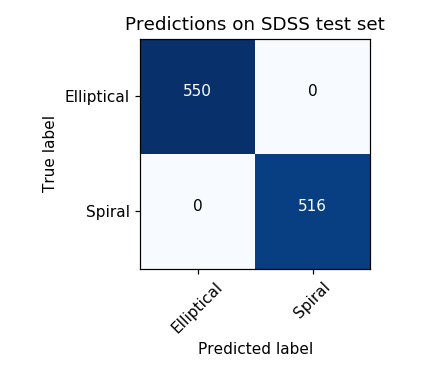

In [17]:
cm = confusion_matrix(final['Actuals'], final['Predictions'])
plot_confusion_matrix(cm, classes=['Elliptical', 'Spiral'], title="Predictions on SDSS test set", figure_size=(4,3.4))

#### Looking at some examples of correctly and incorrectly classified pictures 

In [18]:
#Seperate into Correct/InCorrect

Correctly_classified = final[ final.Predictions == final.Actuals ]
Incorrectly_classified = final[ final.Predictions != final.Actuals ]

In [19]:
#Seperate into Spiral/Elliptical

cc_spirals = Correctly_classified[ Correctly_classified.P_CS_DEBIASED > Correctly_classified.P_EL_DEBIASED ]
cc_elliptical = Correctly_classified[ Correctly_classified.P_CS_DEBIASED < Correctly_classified.P_EL_DEBIASED ]

ic_spirals = Incorrectly_classified[ Incorrectly_classified.P_CS_DEBIASED > Incorrectly_classified.P_EL_DEBIASED ]
ic_elliptical = Incorrectly_classified[ Incorrectly_classified.P_CS_DEBIASED < Incorrectly_classified.P_EL_DEBIASED ]

<IPython.core.display.Javascript object>


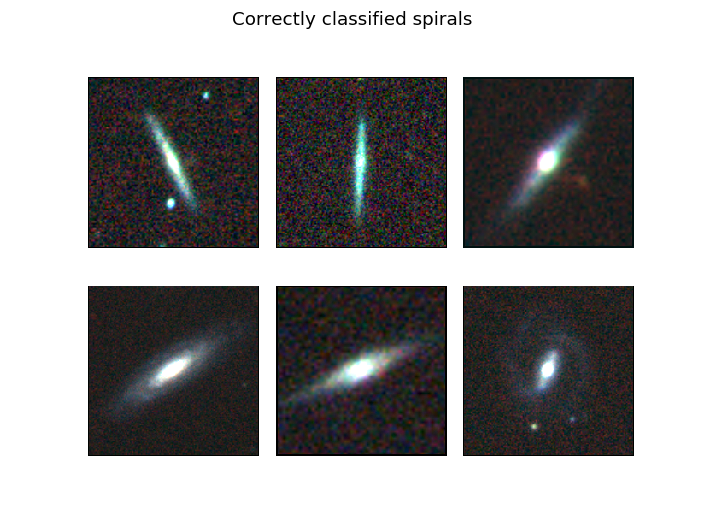

In [22]:
# Correct Spirals

for i, file in enumerate( np.random.choice(cc_spirals.Filename, 6, replace=False) ): 
    plt.subplot(2,3,i+1)
    plt.axis('Off')
    plt.subplots_adjust(wspace=0.1,hspace=0.05)
    plt.suptitle('Correctly classified spirals')
    img = plt.imread(HP_SDSS_test_data_dir + file)
    plt.imshow(img)

<IPython.core.display.Javascript object>


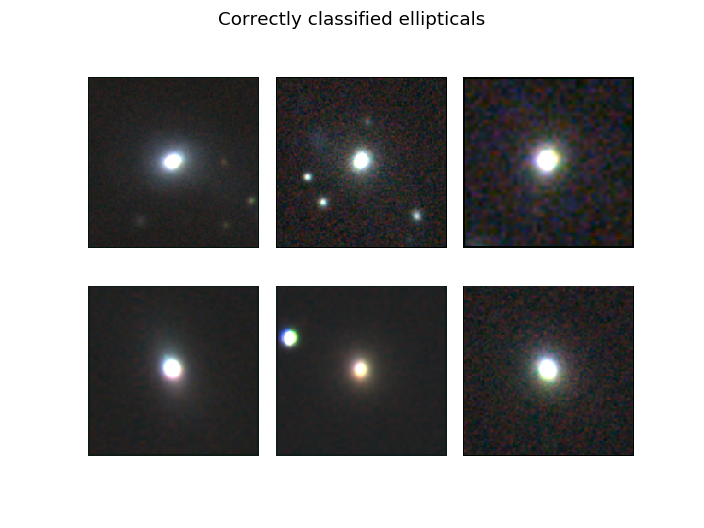

In [24]:
# Correct Ellipticals

for i, file in enumerate( np.random.choice(cc_elliptical.Filename, 6, replace=False) ): 
    plt.subplot(2,3,i+1)
    plt.axis('Off')
    plt.subplots_adjust(wspace=0.1,hspace=0.05)
    plt.suptitle('Correctly classified ellipticals')
    img = plt.imread(HP_SDSS_test_data_dir + file)
    plt.imshow(img)

### (ii) DES 

In [25]:
HP_DES_predictions = model_final.predict_generator(HP_DES_test_generator,  verbose=1)

1066/1066 [==============================] - 15s 14ms/step


In [26]:
HP_DES_predicted_class_indices=np.argmax(HP_DES_predictions,axis=1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in HP_DES_predicted_class_indices]

filenames=HP_DES_test_generator.filenames

results=pd.DataFrame({"Filename":filenames,
                      "Labels":predictions,
                     "Predictions":HP_DES_predicted_class_indices})

In [27]:
results['OBJID'] = results['Filename'].apply(lambda x: x.split('/')[-1][:-4]).astype('int64') 
final = pd.merge(results, HP_crossmatch_df, left_on='OBJID', right_on='DES_COADD_OBJECT_ID')
final['Actuals'] = final['P_CS_DEBIASED'] > final['P_EL_DEBIASED']

In [28]:
final[['OBJID','Predictions','Actuals', 'Labels', 'P_EL_DEBIASED', 'P_CS_DEBIASED']].head()

OBJID  Predictions  Actuals      Labels  P_EL_DEBIASED  P_CS_DEBIASED
0  102514934            0    False  elliptical          0.955          0.000
1  102534884            1     True      spiral          0.000          1.000
2  103077374            1     True      spiral          0.000          1.000
3  103087637            0    False  elliptical          0.950          0.000
4  103355741            1     True      spiral          0.015          0.985

In [29]:
print( "Accuracy: ", metrics.accuracy_score(final['Actuals'], final['Predictions']) )
print( "f1_score: ", metrics.f1_score(final['Actuals'], final['Predictions']))

Accuracy:  0.9971857410881801
f1_score:  0.9970958373668926


<IPython.core.display.Javascript object>


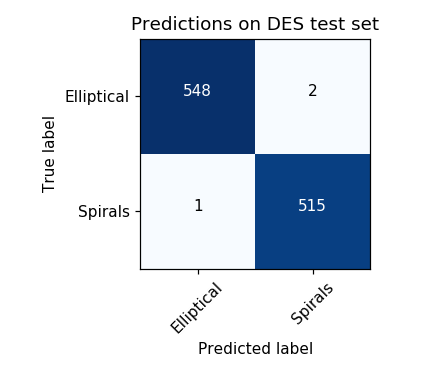

In [30]:
cm = confusion_matrix(final['Actuals'], final['Predictions'])
plot_confusion_matrix(cm, classes=['Elliptical', 'Spirals'], title="Predictions on DES test set", figure_size=(4,3.4))

#### Looking at some examples of correctly and incorrectly classified pictures 

In [31]:
#Seperate into Correct/InCorrect

Correctly_classified = final[ final.Predictions == final.Actuals ]
Incorrectly_classified = final[ final.Predictions != final.Actuals ]

In [32]:
#Seperate into Spiral/Elliptical

cc_spirals = Correctly_classified[ Correctly_classified.P_CS_DEBIASED > Correctly_classified.P_EL_DEBIASED ]
cc_elliptical = Correctly_classified[ Correctly_classified.P_CS_DEBIASED < Correctly_classified.P_EL_DEBIASED ]

ic_spirals = Incorrectly_classified[ Incorrectly_classified.P_CS_DEBIASED > Incorrectly_classified.P_EL_DEBIASED ]
ic_elliptical = Incorrectly_classified[ Incorrectly_classified.P_CS_DEBIASED < Incorrectly_classified.P_EL_DEBIASED ]

<IPython.core.display.Javascript object>


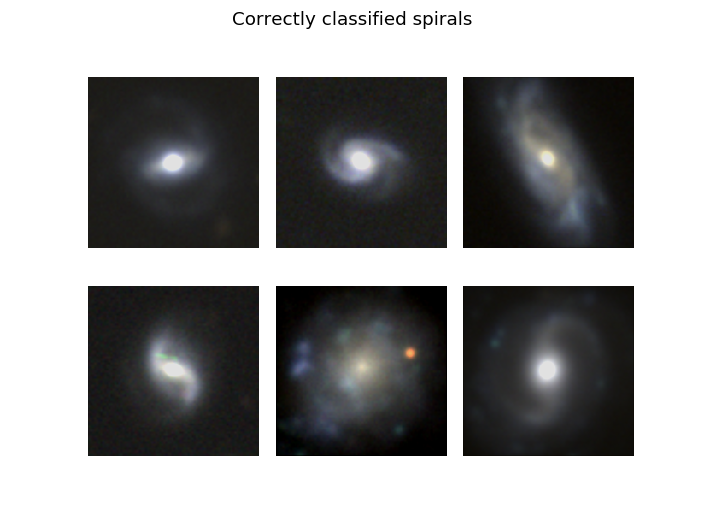

In [33]:
# Correct Spirals

for i, file in enumerate( np.random.choice(cc_spirals.Filename, 6, replace=False) ): 
    plt.subplot(2,3,i+1)
    plt.axis('Off')
    plt.subplots_adjust(wspace=0.1,hspace=0.05)
    plt.suptitle('Correctly classified spirals')
    img = plt.imread(HP_DES_test_data_dir + file)
    plt.imshow(img)

<IPython.core.display.Javascript object>


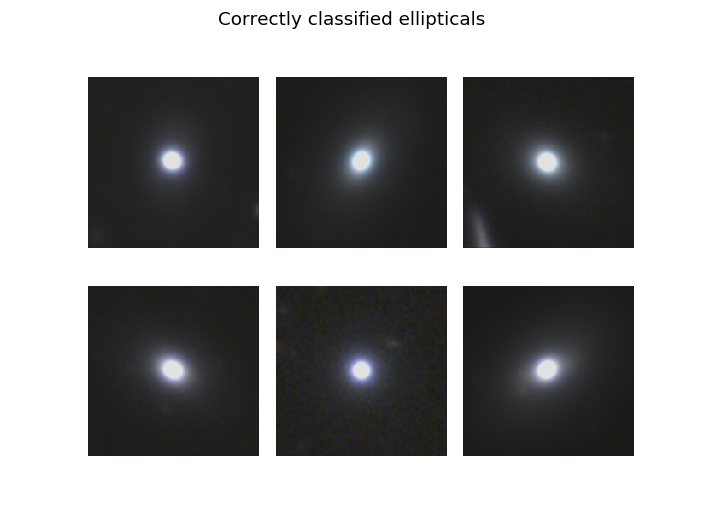

In [36]:
# Correct Ellipticals

for i, file in enumerate( np.random.choice(cc_elliptical.Filename, 6, replace=False) ): 
    plt.subplot(2,3,i+1)
    plt.axis('Off')
    plt.subplots_adjust(wspace=0.1,hspace=0.05)
    plt.suptitle('Correctly classified ellipticals')
    img = plt.imread(HP_DES_test_data_dir + file)
    plt.imshow(img)

<IPython.core.display.Javascript object>


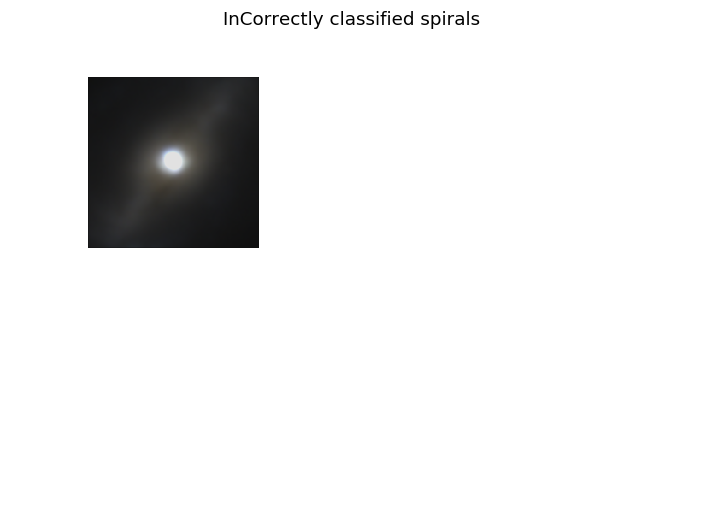

In [38]:
# InCorrect Spirals

for i, file in enumerate( np.random.choice(ic_spirals.Filename, len(ic_spirals), replace=False) ): 
    plt.subplot(2,3,i+1)
    plt.axis('Off')
    plt.subplots_adjust(wspace=0.1,hspace=0.05)
    plt.suptitle('InCorrectly classified spirals')
    img = plt.imread(HP_DES_test_data_dir + file)
    plt.imshow(img)

<IPython.core.display.Javascript object>


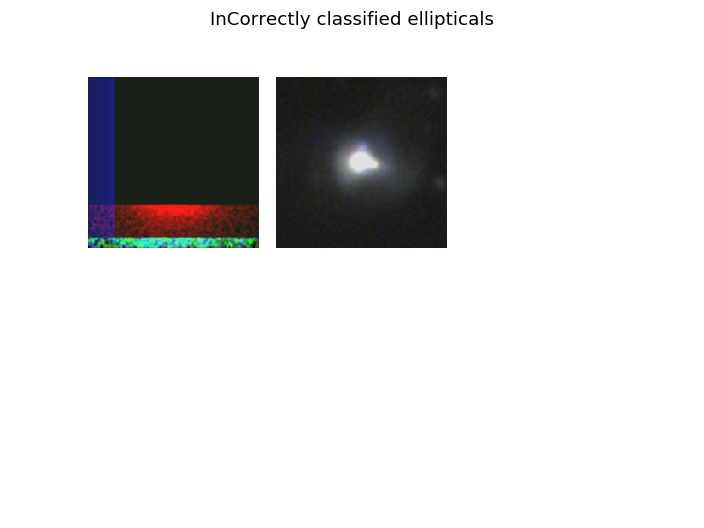

In [39]:
# InCorrect Spirals

for i, file in enumerate( np.random.choice(ic_elliptical.Filename, len(ic_elliptical), replace=False) ): 
    plt.subplot(2,3,i+1)
    plt.axis('Off')
    plt.subplots_adjust(wspace=0.1,hspace=0.05)
    plt.suptitle('InCorrectly classified ellipticals')
    img = plt.imread(HP_DES_test_data_dir + file)
    plt.imshow(img)

# 6. FO Crossmatch Test  

### (i) SDSS 

In [140]:
FO_SDSS_predictions = model_final.predict_generator(FO_SDSS_test_generator,  verbose=1)

12596/12596 [==============================] - 278s 22ms/step


In [150]:
FO_SDSS_predicted_class_indices=np.argmax(FO_SDSS_predictions,axis=1)

In [186]:
pos = np.where( FO_SDSS_predictions[ range( FO_SDSS_predictions.shape[0] ), FO_SDSS_predicted_class_indices ] > 0.9999 )[0]




In [187]:
FO_SDSS_predicted_class_indices=np.argmax(FO_SDSS_predictions,axis=1)

#FO_SDSS_predicted_class_indices = FO_SDSS_predicted_class_indices[pos]

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in FO_SDSS_predicted_class_indices[pos]]

filenames= np.array( FO_SDSS_test_generator.filenames )[pos]

results=pd.DataFrame({"Filename":filenames,
                      "Labels":predictions,
                     "Predictions":FO_SDSS_predicted_class_indices[pos]})

In [188]:
results['OBJID'] = results['Filename'].apply(lambda x: x.split('/')[-1][:-4]).astype('int64') 
final = pd.merge(results, FO_crossmatch_df, left_on='OBJID', right_on='SDSS_OBJID')
final['Actuals'] = final['P_CS_DEBIASED'] > final['P_EL_DEBIASED']

In [189]:
final[['OBJID','Predictions','Actuals', 'Labels', 'P_EL_DEBIASED', 'P_CS_DEBIASED']].head()

OBJID  Predictions  Actuals      Labels  P_EL_DEBIASED  \
0  587724241764483150            1     True      spiral          0.090   
1  587724241764745346            0    False  elliptical          0.573   
2  587724241764810851            1     True      spiral          0.174   
3  587724241764810864            0    False  elliptical          0.899   
4  587724241764810882            0    False  elliptical          0.721   

   P_CS_DEBIASED  
0          0.910  
1          0.365  
2          0.514  
3          0.082  
4          0.217

In [190]:
final.shape

(7663, 250)

In [191]:
print( "Accuracy: ", metrics.accuracy_score(final['Actuals'], final['Predictions']) )
print( "f1_score: ", metrics.f1_score(final['Actuals'], final['Predictions']))

Accuracy:  0.9579799034320762
f1_score:  0.9569633787757283


<IPython.core.display.Javascript object>


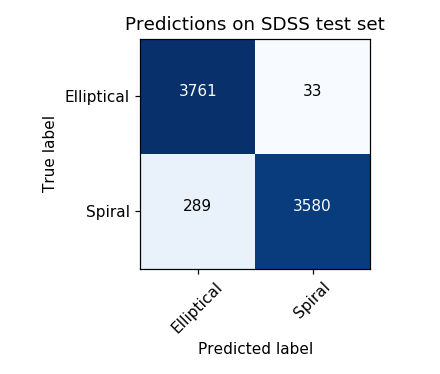

In [192]:
cm = confusion_matrix(final['Actuals'], final['Predictions'])
plot_confusion_matrix(cm, classes=['Elliptical', 'Spiral'], title="Predictions on SDSS test set", figure_size=(4,3.4))

#### Looking at some examples of correctly and incorrectly classified pictures 

In [193]:
#Seperate into Correct/InCorrect

Correctly_classified = final[ final.Predictions == final.Actuals ]
Incorrectly_classified = final[ final.Predictions != final.Actuals ]

In [194]:
#Seperate into Spiral/Elliptical

cc_spirals = Correctly_classified[ Correctly_classified.P_CS_DEBIASED > Correctly_classified.P_EL_DEBIASED ]
cc_elliptical = Correctly_classified[ Correctly_classified.P_CS_DEBIASED < Correctly_classified.P_EL_DEBIASED ]

ic_spirals = Incorrectly_classified[ Incorrectly_classified.P_CS_DEBIASED > Incorrectly_classified.P_EL_DEBIASED ]
ic_elliptical = Incorrectly_classified[ Incorrectly_classified.P_CS_DEBIASED < Incorrectly_classified.P_EL_DEBIASED ]

<IPython.core.display.Javascript object>


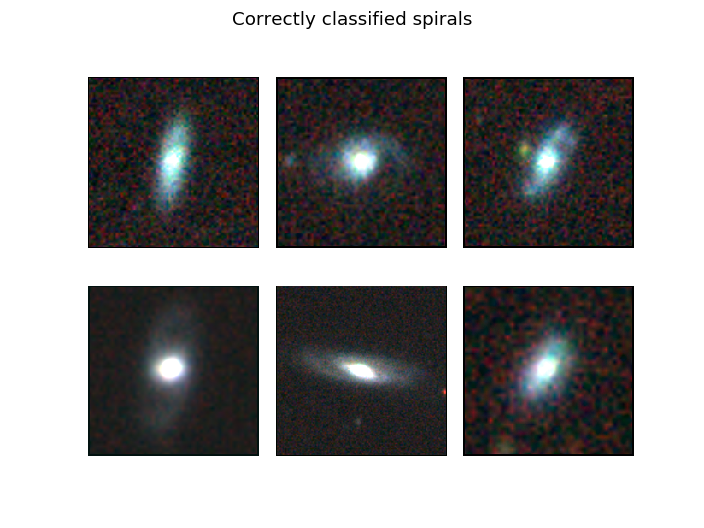

In [195]:
# Correct Spirals

for i, file in enumerate( np.random.choice(cc_spirals.Filename, 6, replace=False) ): 
    plt.subplot(2,3,i+1)
    plt.axis('Off')
    plt.subplots_adjust(wspace=0.1,hspace=0.05)
    plt.suptitle('Correctly classified spirals')
    img = plt.imread(FO_SDSS_test_data_dir + file)
    plt.imshow(img)

<IPython.core.display.Javascript object>


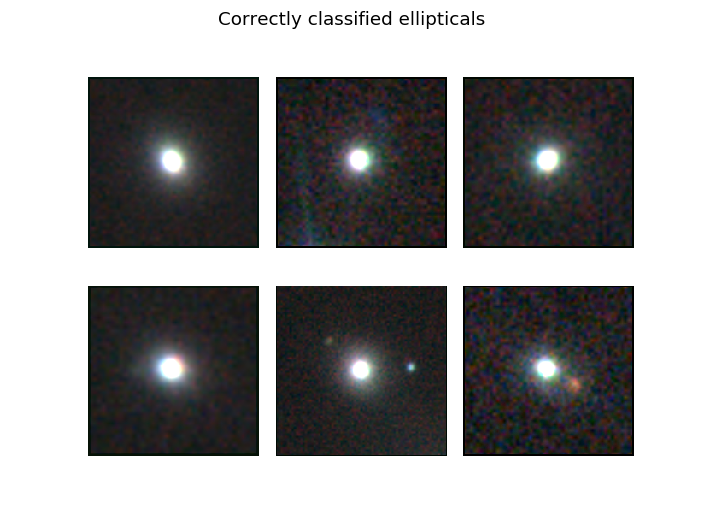

In [199]:
# Correct Ellipticals

for i, file in enumerate( np.random.choice(cc_elliptical.Filename, 6, replace=False) ): 
    plt.subplot(2,3,i+1)
    plt.axis('Off')
    plt.subplots_adjust(wspace=0.1,hspace=0.05)
    plt.suptitle('Correctly classified ellipticals')
    img = plt.imread(FO_SDSS_test_data_dir + file)
    plt.imshow(img)

<IPython.core.display.Javascript object>


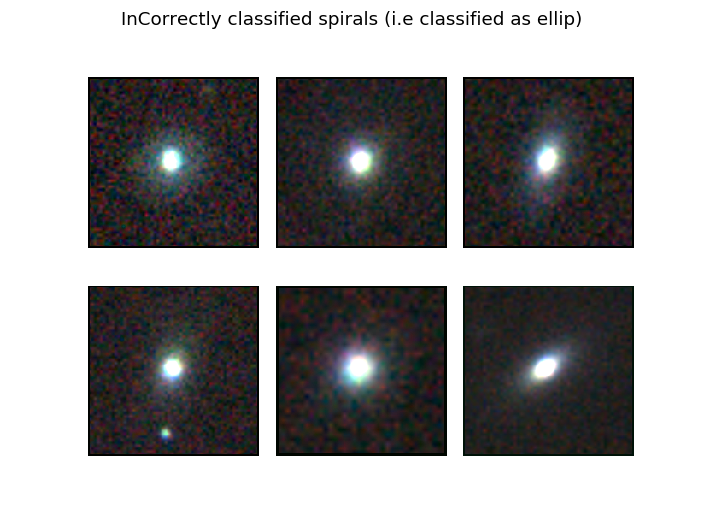

In [204]:
# InCorrect Spirals

for i, file in enumerate( np.random.choice(ic_spirals.Filename, 6, replace=False) ): 
    plt.subplot(2,3,i+1)
    plt.axis('Off')
    plt.subplots_adjust(wspace=0.1,hspace=0.05)
    plt.suptitle('InCorrectly classified spirals (i.e classified as ellip)')
    img = plt.imread(FO_SDSS_test_data_dir + file)
    plt.imshow(img)

<IPython.core.display.Javascript object>


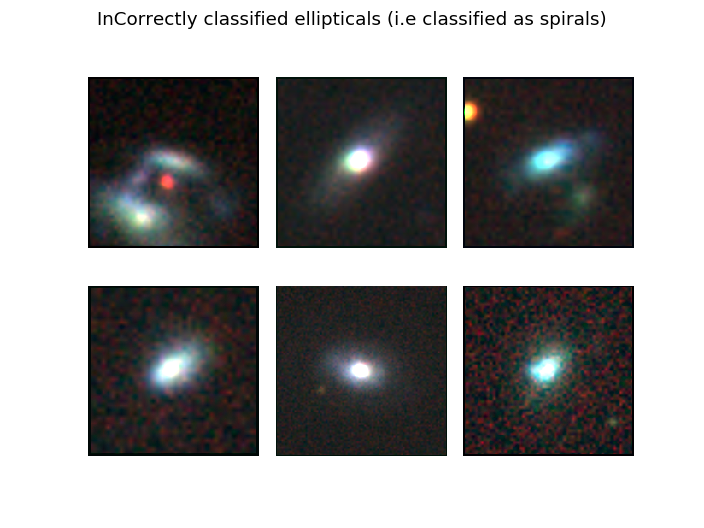

In [205]:
# InCorrect Elliptical

for i, file in enumerate( np.random.choice(ic_elliptical.Filename, 6, replace=False) ): 
    plt.subplot(2,3,i+1)
    plt.axis('Off')
    plt.subplots_adjust(wspace=0.1,hspace=0.05)
    plt.suptitle('InCorrectly classified ellipticals (i.e classified as spirals)')
    img = plt.imread(FO_SDSS_test_data_dir + file)
    plt.imshow(img)